In [12]:
# 必要なライブラリをインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import ast

# 日本語フォントを使用する
plt.rcParams['font.family'] = 'IPAexGothic'

In [13]:
# 分を24時間表示に変換
def calculate_time(minutes):
    # 9:00 を0分、20:00 を660分として計算
    start_time = 9 * 60  # 9:00を分単位に変換
    end_time = 20 * 60  # 20:00を分単位に変換
    
    total_minutes = start_time + minutes
    
    # 時間と分に変換
    hours = total_minutes // 60
    mins = total_minutes % 60
    
    # 24時間表記に変換
    if hours >= 24:
        hours -= 24
    
    # 時間と分を文字列に変換して返す
    return f"{hours:02d}:{mins:02d}"

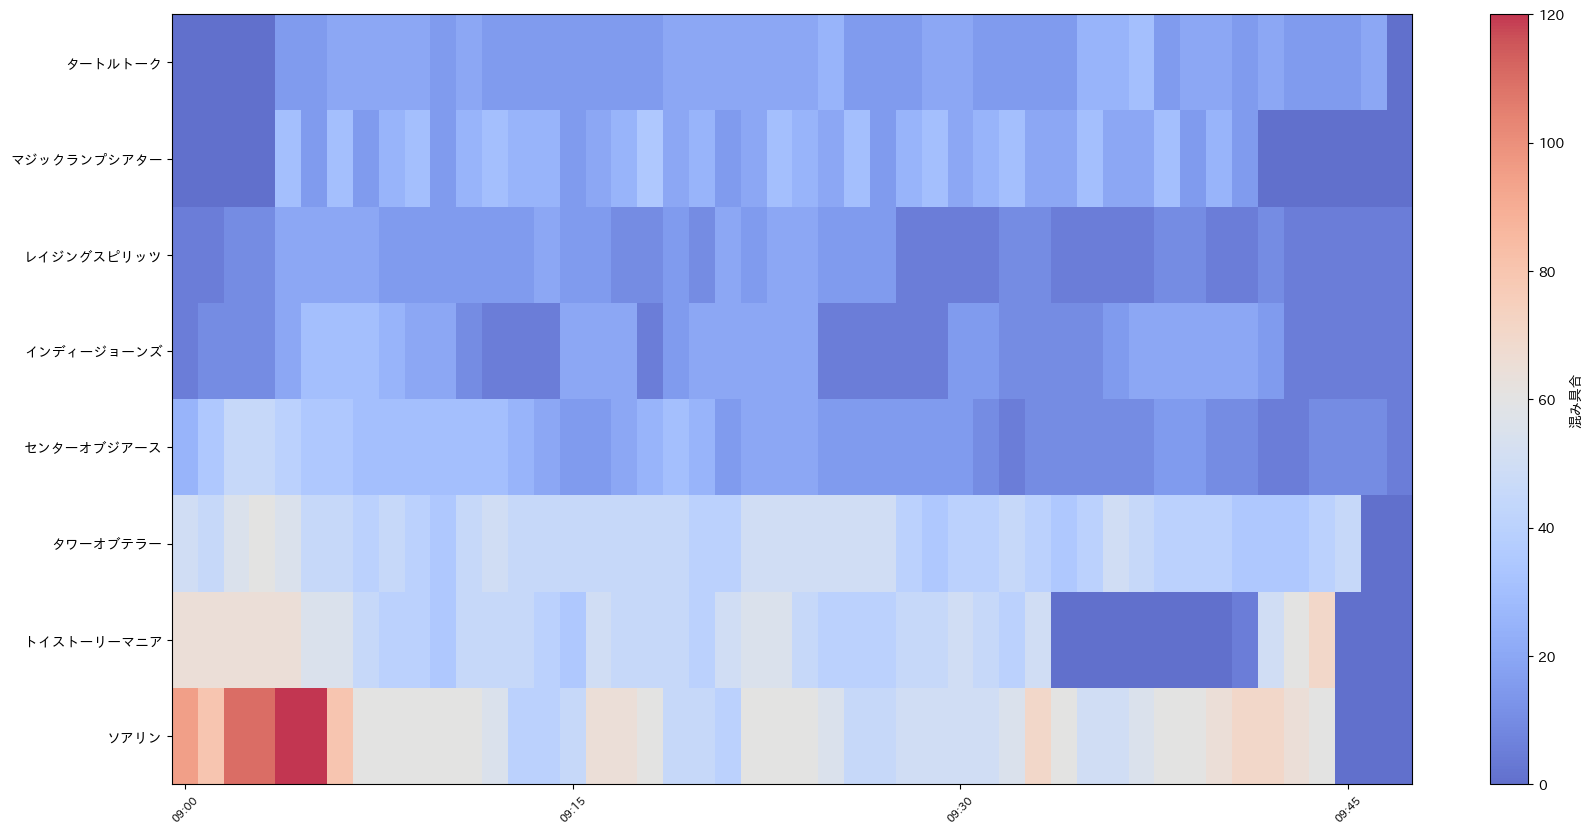

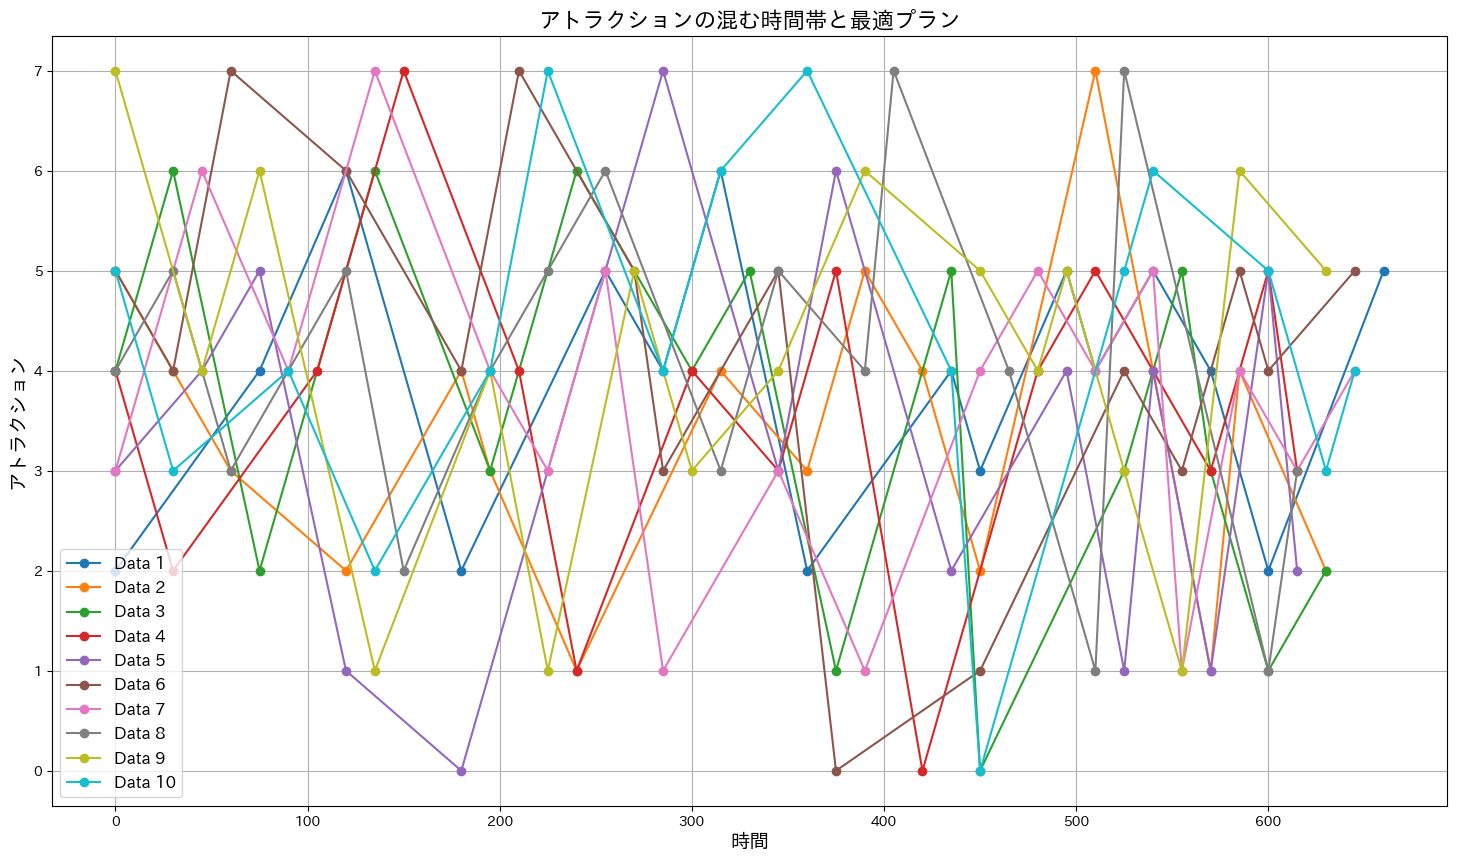

In [15]:
# CSVファイルからデータを読み込む
heatmap_csv_file = './waittime_heatmap_csv/2022-07-01_waittime.csv'
line_csv_file = './automation_best_result_csv/re_best_results_2022-07-01_r10_t30_review.csv'  # 折れ線グラフ用のCSVファイル

# ヒートマップデータの読み込み
heatmap_df = pd.read_csv(heatmap_csv_file)
heatmap_df = heatmap_df.loc[:, ~heatmap_df.columns.str.contains('^Unnamed')]
heatmap_df = heatmap_df.apply(pd.to_numeric, errors='coerce')
heatmap_data = heatmap_df.values

# 折れ線グラフ用データの読み込み
line_df = pd.read_csv(line_csv_file)

# アトラクションの名前
attractions = ['ソアリン', 'トイストーリーマニア', 'タワーオブテラー', 'センターオブジアース',
               'インディージョーンズ', 'レイジングスピリッツ', 'マジックランプシアター', 'タートルトーク']

# プロットの準備
plt.figure(figsize=(20, 10))

# ヒートマップを表示
norm = Normalize(vmin=np.nanmin(heatmap_data), vmax=np.nanmax(heatmap_data))
cax = plt.imshow(heatmap_data, aspect='auto', cmap='coolwarm', norm=norm, interpolation='nearest', alpha=0.8)

# x軸とy軸の設定
x_ticks = range(0, 706, 15)
x_labels = [f'{calculate_time(tick)}' for tick in x_ticks]
plt.xticks(x_ticks, x_labels, rotation=45, fontsize=8)
plt.ylim(0, 7)
plt.yticks(range(8), [attractions[i] for i in range(8)], fontsize=10)

# x軸とy軸の範囲を明示的に設定
plt.xlim(-0.5, len(x_ticks) - 0.5)  # x軸の範囲を設定
plt.ylim(-0.5, len(attractions) - 0.5)  # y軸の範囲を設定

# カラーバーの追加
cbar = plt.colorbar(cax, label='混み具合')
cbar.ax.tick_params(labelsize=10)

# プロットの準備
plt.figure(figsize=(18, 10))  # グラフのサイズを広く設定

# 折れ線グラフのデータ処理
optimal_plans_list = [ast.literal_eval(plan) if isinstance(plan, str) else plan for plan in line_df["最適プラン"]]
time_schedule_list = [ast.literal_eval(plan) if isinstance(plan, str) else plan for plan in line_df["タイムスケジュール"]]

# 折れ線グラフのプロット
num_colors = len(optimal_plans_list)
colors = plt.cm.get_cmap('tab10', num_colors)

for i in range(len(optimal_plans_list)):
    plt.plot(time_schedule_list[i], optimal_plans_list[i], marker='o', linestyle='-', 
             label=f'Data {i+1}', color=colors(i))

# グラフの詳細設定
plt.xlabel("時間", fontsize=14)
plt.ylabel("アトラクション", fontsize=14)
plt.title("アトラクションの混む時間帯と最適プラン", fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid(True)

# グラフを表示
plt.show()


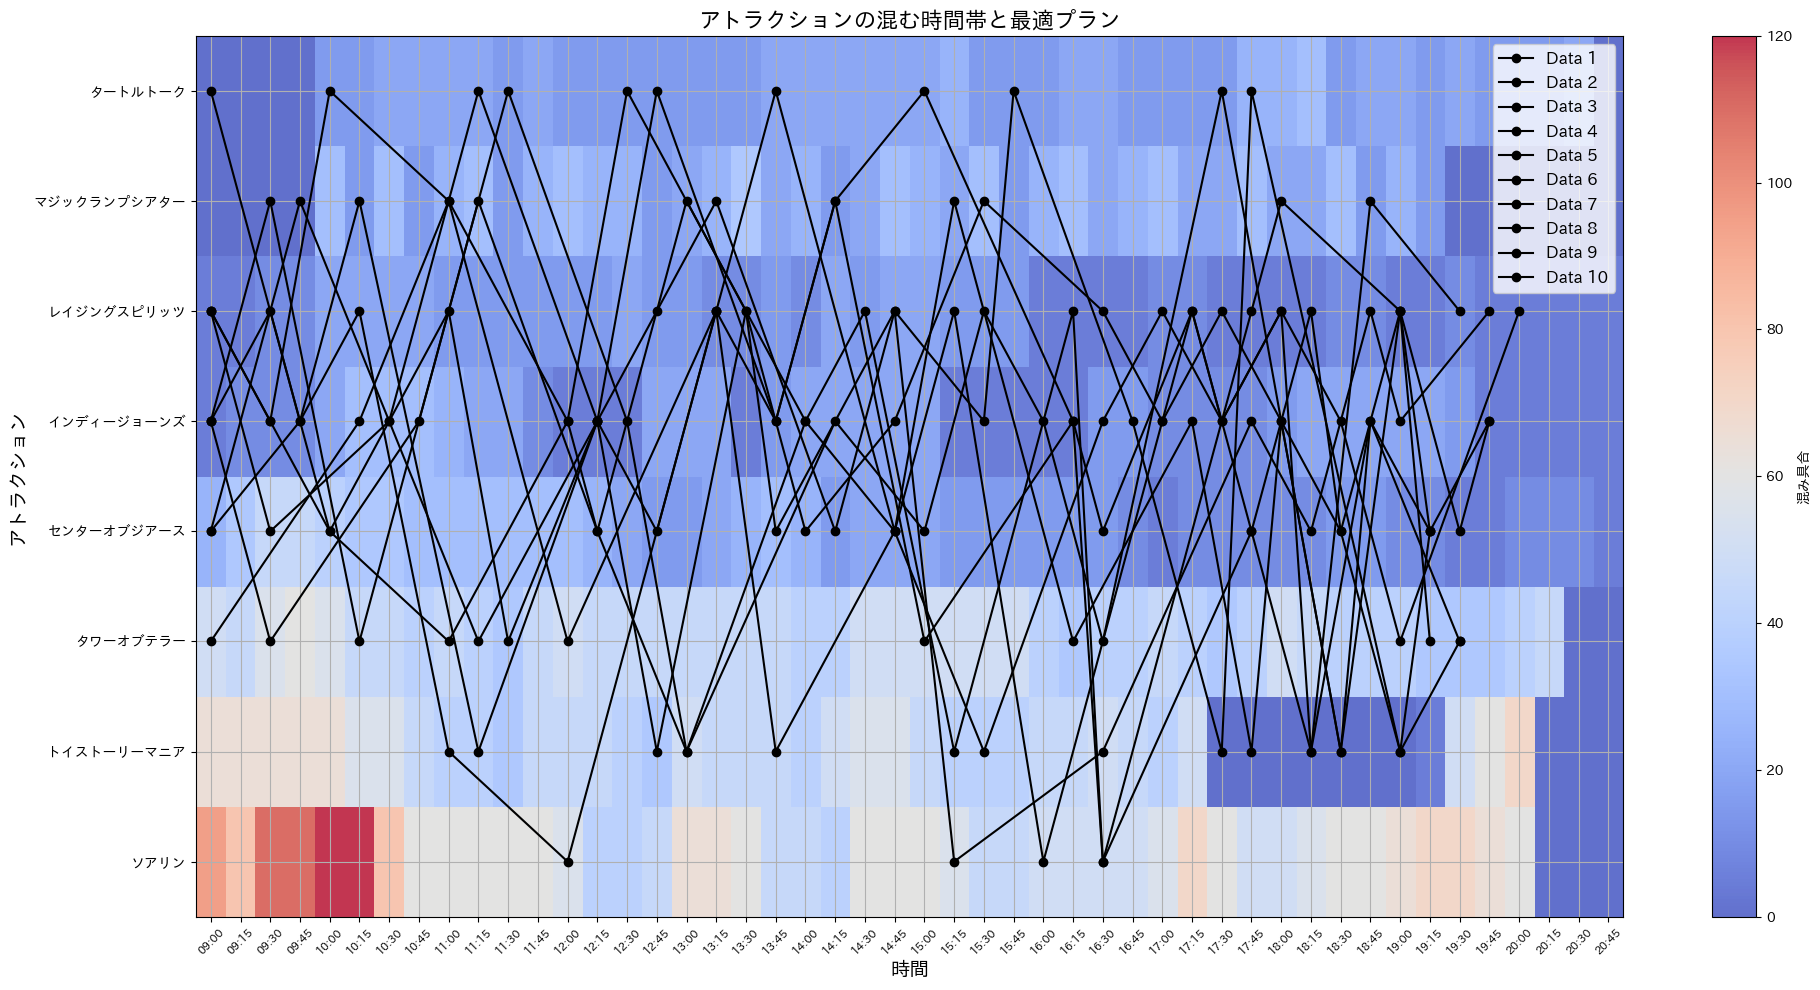

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import ast

# 日本語フォントを使用する
plt.rcParams['font.family'] = 'IPAexGothic'

# CSVファイルからデータを読み込む
heatmap_csv_file = './waittime_heatmap_csv/2022-07-01_waittime.csv'
line_csv_file = './automation_best_result_csv/re_best_results_2022-07-01_r10_t30_review.csv'

# ヒートマップデータの読み込み
heatmap_df = pd.read_csv(heatmap_csv_file)
heatmap_df = heatmap_df.loc[:, ~heatmap_df.columns.str.contains('^Unnamed')]
heatmap_df = heatmap_df.apply(pd.to_numeric, errors='coerce')
heatmap_data = heatmap_df.values
heatmap_columns = heatmap_df.columns.astype(int)  # ヒートマップの列名を整数に変換

# 折れ線グラフ用データの読み込み
line_df = pd.read_csv(line_csv_file)

# アトラクションの名前
attractions = ['ソアリン', 'トイストーリーマニア', 'タワーオブテラー', 'センターオブジアース',
               'インディージョーンズ', 'レイジングスピリッツ', 'マジックランプシアター', 'タートルトーク']

# プロットの準備
plt.figure(figsize=(20, 10))

# ヒートマップを表示
norm = Normalize(vmin=np.nanmin(heatmap_data), vmax=np.nanmax(heatmap_data))
cax = plt.imshow(heatmap_data, aspect='auto', cmap='coolwarm', norm=norm, interpolation='nearest', alpha=0.8)

# x軸の設定
start_time = 9 * 60  # 09:00
end_time = 20 * 60 + 45  # 20:45
time_range = range(start_time, end_time + 1, 15)  # 15分刻み
x_labels = [f"{t // 60:02d}:{t % 60:02d}" for t in time_range]

# x軸に15分刻みのラベルを設定
plt.xticks(range(len(x_labels)), x_labels, rotation=45, fontsize=8)

# y軸の設定
plt.yticks(range(len(attractions)), attractions, fontsize=10)

# y軸の順番を逆にする
plt.gca().invert_yaxis()

# カラーバーの追加
cbar = plt.colorbar(cax, label='混み具合')
cbar.ax.tick_params(labelsize=10)

# 折れ線グラフのデータ処理
optimal_plans_list = [ast.literal_eval(plan) if isinstance(plan, str) else plan for plan in line_df["最適プラン"]]
time_schedule_list = [ast.literal_eval(plan) if isinstance(plan, str) else plan for plan in line_df["タイムスケジュール"]]

# 折れ線グラフのプロット（黒色で、点を少し大きくする）
for i in range(len(optimal_plans_list)):
    adjusted_time_schedule = [np.where(heatmap_columns == tick)[0][0] for tick in time_schedule_list[i]]  # x軸位置を特定
    plt.plot(adjusted_time_schedule, optimal_plans_list[i], marker='o', linestyle='-', 
             label=f'Data {i+1}', color='black', markersize=6)  # 黒色に変更、点のサイズを6に設定

# グラフの詳細設定
plt.xlabel("時間", fontsize=14)
plt.ylabel("アトラクション", fontsize=14)
plt.title("アトラクションの混む時間帯と最適プラン", fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid(True)

# レイアウト調整
plt.tight_layout()
plt.show()


In [36]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.colors import Normalize

# レビュー評価（popularity）
popularity = [476, 465, 473, 472, 480, 452, 461, 478]

def find_optimal_plan_and_plot(date, attraction_list):
    # dfをupdated_combined_data.csvから読み込む
    df = pd.read_csv('updated_combined_data.csv')

    # 最適プランを取得する部分
    attraction_counts = Counter(attraction_list)
    
    # 日付でフィルタリング
    date_filtered_df = df[df['日付'] == date]
    
    def matches_plan(optimal_plan):
        plan_counts = Counter(optimal_plan)
        return all(plan_counts.get(attraction, 0) >= count for attraction, count in attraction_counts.items())

    # "最適プラン" をリストとして扱うよう修正
    excluded_attractions = []
    # '最適プラン'がリストまたは文字列であることを考慮して修正
    for attraction in attraction_counts:
        # '最適プラン'がリストまたは文字列の場合に適切に処理
        date_filtered_df_without_attraction = date_filtered_df[
            date_filtered_df['最適プラン'].apply(
                lambda x: attraction not in ast.literal_eval(x) if isinstance(x, str) else attraction not in x
            )
        ]

        if not date_filtered_df_without_attraction.empty:
            excluded_attractions.append(attraction)
            filtered_df = date_filtered_df_without_attraction[date_filtered_df_without_attraction['最適プラン'].apply(matches_plan)]


    if filtered_df.empty:
        print("指定された条件に合うプランは見つかりませんでした。")
        
        # '日付'が'median'のデータを参照
        median_df = df[df['日付'] == 'median']
        
        if not median_df.empty:
            max_satisfaction_plan = median_df.loc[median_df['トータル満足度'].idxmax()]
            print(f"参考データ（インデックス:{max_satisfaction_plan.name}, 日付:{max_satisfaction_plan['日付']}）")
        else:
            print("日付が'median'のデータは存在しません。すべてのデータから最適プランを選択します。")
            max_satisfaction_plan = df.loc[df['トータル満足度'].idxmax()]
        
        # 足枷となっているアトラクションを除外して再検索
        excluded_attractions = []
        for attraction in attraction_counts:
            date_filtered_df_without_attraction = date_filtered_df[date_filtered_df['最適プラン'].apply(lambda x: attraction not in x)]
            if not date_filtered_df_without_attraction.empty:
                excluded_attractions.append(attraction)
                filtered_df = date_filtered_df_without_attraction[date_filtered_df_without_attraction['最適プラン'].apply(matches_plan)]
        
        if excluded_attractions:
            print(f"除外したアトラクション: {excluded_attractions}")
            if not filtered_df.empty:
                max_satisfaction_plan = filtered_df.loc[filtered_df['トータル満足度'].idxmax()]
            else:
                print("除外後も条件に合うプランは見つかりませんでした。")
        
    else:
        max_satisfaction_plan = filtered_df.loc[filtered_df['トータル満足度'].idxmax()]
    
    print(f"参考データ：{max_satisfaction_plan['日付']}")
    print("最適プラン:", max_satisfaction_plan['最適プラン'])
    print("タイムスケジュール:", max_satisfaction_plan['タイムスケジュール'])
    print("トータル満足度:", max_satisfaction_plan['トータル満足度'])
    print("トータル所要時間:", max_satisfaction_plan['トータル所要時間'])
    
    # ここでride_printer関数を呼び出す
    ride_lst = max_satisfaction_plan['最適プラン']
    ride_time = max_satisfaction_plan['タイムスケジュール']
    
    if isinstance(ride_time, str):
        ride_time = ast.literal_eval(ride_time)  # 文字列をリストに変換
    
    # 同じアトラクションが連続している場合、そのアトラクションを削除
    filtered_ride_lst = []
    filtered_ride_time = []
    
    for i in range(len(ride_lst)):
        if i == 0 or ride_lst[i] != ride_lst[i - 1]:
            filtered_ride_lst.append(ride_lst[i])
            filtered_ride_time.append(ride_time[i])

    print("更新された最適プラン:", filtered_ride_lst)
    print("更新されたタイムスケジュール:", filtered_ride_time)
    
    # トータル満足度を再計算
    total_popularity = sum([popularity[ride] for ride in filtered_ride_lst])
    
    total_satisfaction = total_popularity
    
    print("再計算されたトータル満足度:", total_satisfaction)

    # 次にヒートマップと折れ線グラフをプロット
    heatmap_csv_file = f'./waittime_heatmap_csv/{date}_heatmap.csv'
    line_csv_file = f'./waittime_heatmap_csv/{date}_line_plot.csv'

    plot_waittime_and_optimal_plans(heatmap_csv_file, line_csv_file, filtered_ride_lst, filtered_ride_time)


def plot_waittime_and_optimal_plans(heatmap_csv_file, line_csv_file, optimal_ride_lst, optimal_ride_time):
    """
    ヒートマップと折れ線グラフをプロットする関数。

    Parameters:
    - heatmap_csv_file (str): ヒートマップデータのCSVファイルパス。
    - line_csv_file (str): 折れ線グラフデータのCSVファイルパス。
    - optimal_ride_lst (list): 最適プランのアトラクション番号リスト。
    - optimal_ride_time (list): 最適プランのタイムスケジュール。
    """
    plt.rcParams['font.family'] = 'IPAexGothic'

    heatmap_df = pd.read_csv(heatmap_csv_file)
    heatmap_df = heatmap_df.loc[:, ~heatmap_df.columns.str.contains('^Unnamed')]
    heatmap_df = heatmap_df.apply(pd.to_numeric, errors='coerce')
    heatmap_data = heatmap_df.values
    heatmap_columns = heatmap_df.columns.astype(int)

    line_df = pd.read_csv(line_csv_file)

    plt.figure(figsize=(20, 10))

    norm = Normalize(vmin=np.nanmin(heatmap_data), vmax=np.nanmax(heatmap_data))
    cax = plt.imshow(heatmap_data, aspect='auto', cmap='coolwarm', norm=norm, interpolation='nearest', alpha=0.8)

    # 時間帯の表示
    time_range = range(9 * 60, (20 + 45) + 1, 15)
    x_labels = [f"{t // 60:02d}:{t % 60:02d}" for t in time_range]
    plt.xticks(range(len(x_labels)), x_labels, rotation=45, fontsize=8)

    # アトラクションの表示
    plt.yticks(range(len(optimal_ride_lst)), optimal_ride_lst, fontsize=10)
    plt.gca().invert_yaxis()

    # カラーバーの設定
    cbar = plt.colorbar(cax, label='混み具合')
    cbar.ax.tick_params(labelsize=10)

    # 折れ線グラフのプロット
    for i in range(len(optimal_ride_lst)):
        adjusted_time_schedule = [np.where(heatmap_columns == tick)[0][0] for tick in optimal_ride_time[i]]
        plt.plot(adjusted_time_schedule, optimal_ride_lst[i], marker='o', linestyle='-', 
                 label=f'Data {i+1}', color='black', markersize=6)

    plt.xlabel("時間", fontsize=14)
    plt.ylabel("アトラクション", fontsize=14)
    plt.title("アトラクションの混む時間帯と最適プラン", fontsize=16)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True)

    plt.tight_layout()
    plt.show()


# 使用例:
find_optimal_plan_and_plot('2022-07-01', [0])


指定された条件に合うプランは見つかりませんでした。
参考データ（インデックス:9948, 日付:median）


TypeError: 'in <string>' requires string as left operand, not int